In [20]:
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [21]:
import numpy as np
import pandas as pd
from PIL import Image
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
%matplotlib inline
plt.style.use('default')

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols   =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url, sep =' ', skipinitialspace = True, header = None, names =cols, index_col = False)

In [24]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [25]:
def KumSum(var_prop):
    kumSum = 0
    kumVar = []
    for x in var_prop:
        kumSum += x
        kumVar.append(np.round(kumSum, decimals=5))

    return kumVar

In [26]:
def hauptkomponentenanalyse(data):
    u, s, v = np.linalg.svd(data)
    
    eigenwerte = np.round(s**2/(len(u)), decimals=3)  # Warum?
    var_prop = np.round(s**2/np.sum(s**2), decimals=3)
    kumVar = KumSum(var_prop)
    
    pcas = ['PC' + str(i) for i in range(1, len(kumVar) + 1)]
    resTable = pd.DataFrame(eigenwerte, columns=["Eigenwerte"], index=pcas)
    resTable = resTable.assign(Anteil=var_prop, SumAnteil=kumVar)
    return u, s, v, resTable

In [27]:
boston_scaled = (boston-boston.mean())/boston.std()
u, s, v, resTable = hauptkomponentenanalyse(boston_scaled)

In [28]:
resTable

,Eigenwerte,Anteil,SumAnteil
PC1,6.533,0.468,0.468
PC2,1.646,0.118,0.586
PC3,1.346,0.096,0.682
PC4,0.885,0.063,0.745
PC5,0.849,0.061,0.806
PC6,0.659,0.047,0.853
PC7,0.534,0.038,0.891
PC8,0.402,0.029,0.920
PC9,0.277,0.020,0.940
PC10,0.252,0.018,0.958


Wieviele Dimensionen können Sie weglassen,wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

10% - braucht PC1 bis PC8

5%- braucht PC1 bis PC10

1% - braucht PC1 bis PC13

______________________
c. Korrelationskoeffizienten der Projektionen auf die ersten drei Haupt-komponenten mit den ursprünglichen Variablen berechnen.

In [29]:
pcs = ['PC' + str(i) for i in range(1, 4)]
svd_df = pd.DataFrame(u[:,0:3], columns=pcs)

In [30]:
def corrFunction(pc):
    print(pc)
    for col in boston:
        print(col + "  "+ str(svd_df[pc].corr(boston[col])))

In [31]:
svd_df

,PC1,PC2,PC3
0,-0.036269,0.017059,-0.012861
1,-0.023863,-0.005916,-0.036974
2,-0.041294,0.031638,-0.003446
3,-0.049308,0.006745,0.002317
4,-0.048181,0.014998,0.002451
...,...,...,...
501,-0.005262,0.004941,-0.039992
502,-0.000754,-0.004004,-0.053220
503,-0.006397,0.028492,-0.035732
504,-0.004593,0.018692,-0.039550


In [32]:
for pc in pcs:
    corrFunction(pc)

PC1
CRIM  0.61988795464206
ZN  -0.6279486908308012
INDUS  0.8490675258940809
CHAS  -0.012861985542206118
NOX  0.8320128220843397
RM  -0.5189088229589807
AGE  0.7598184730484974
DIS  -0.762871379509314
RAD  0.776285522305149
TAX  0.8290428264648294
PTRATIO  0.5313508216937093
B  -0.5031018273136207
LSTAT  0.7967157655078198
TGT  -0.6821927278158157
PC2
CRIM  -0.08460353585689552
ZN  -0.19008588110414903
INDUS  0.1632084960665986
CHAS  0.5274387457514247
NOX  0.3265775687677394
RM  0.5574114735177774
AGE  0.33431808840568594
DIS  -0.4612710553247959
RAD  0.04000670387487663
TAX  0.01136822339214794
PTRATIO  -0.40408330905975165
B  0.034010676762787545
LSTAT  -0.25846743943582956
TGT  0.5714346810500025
PC3
CRIM  0.4588524325784436
ZN  0.4582348971864407
INDUS  -0.07674912637898204
CHAS  -0.14553258571751207
NOX  -0.05397782205253828
RM  0.41045435360791616
AGE  -0.2332407617886816
DIS  0.18242338430045402
RAD  0.48606798504609705
TAX  0.39863814001985076
PTRATIO  0.0004635151151840148
B 

Wie erwartet sind die Korrelationen der ursprünglichen Variablen mit der ersten Hauptkomponente am stärksten. Die Korrelationen der nächsten Hauptkomponenten nehmen weiterhin ab.

_______________
d. Darstellung der ersten beiden neuen Variablen als Scatterplot

In [33]:
pcs = ['PC' + str(i) for i in range(1, 3)]
svd_df = pd.DataFrame(u[:,0:2], columns=pcs)
svd_df

,PC1,PC2
0,-0.036269,0.017059
1,-0.023863,-0.005916
2,-0.041294,0.031638
3,-0.049308,0.006745
4,-0.048181,0.014998
...,...,...
501,-0.005262,0.004941
502,-0.000754,-0.004004
503,-0.006397,0.028492
504,-0.004593,0.018692


In [34]:
tgtMean = boston["TGT"].mean() # 0.75 Quantil: tgtMean = boston[["TGT"]].quantile(.75)[0]

tgtbiggerMean = boston[boston.TGT > tgtMean]
tgtlowerMean = boston[boston.TGT <= tgtMean]

In [35]:
dataBiggerMean = svd_df[svd_df.index.isin(tgtbiggerMean.index)]
dataLowerMean = svd_df[svd_df.index.isin(tgtlowerMean.index)]

Text(0, 0.5, 'y')

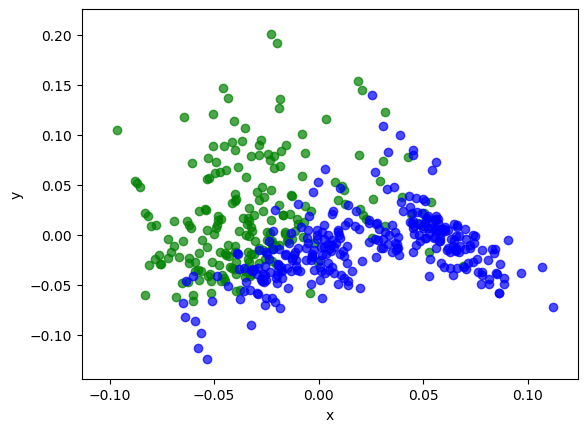

In [36]:
plt.scatter(dataBiggerMean['PC1'], dataBiggerMean['PC2'], color='g', alpha=0.7)
plt.scatter(dataLowerMean['PC1'], dataLowerMean['PC2'], color='b', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')

Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

Ja, man sieht das sich zwei Cluster bilden. Die grünen Punkte sind die Daten wo der Hauspreis größer als der Durchschnitt ist, wohingegen die blauen Punkte unterhalb des Medians sind. Verschiebt man diese Grenze nach oben, zum Beispiel das 0.75 Quantil, so erkennt man dies auch entsprechend der Einfärbung im Plot.

### 2. Eigengesicher

In [37]:
os.chdir('/home/benny/MSI/ML/Ubungen/lfw')

In [38]:
os.getcwd()

'/home/benny/MSI/ML/Ubungen/lfw'

In [39]:
def processImageAndStackAsVector(filePath, fileName):
    image = Image.open(filePath).convert('L')
    crop_rectangle = (50, 50, 200, 200)
    cropped_im = image.crop(crop_rectangle)
    img_resized = cropped_im.resize((32, 32))
    img_arr=np.array(img_resized)
    #showImage(img_arr)
    flat_arr = img_arr.ravel()
    flat_arr = np.append(flat_arr, fileName)
    vector = np.matrix(flat_arr)
    return pd.DataFrame(vector)

In [40]:
def showImage(ursFormat):
    plt.figure(figsize=(5,2))
    plt.imshow(ursFormat)
    plt.show()

Bildpfade mit Namen als Array aufbereiten

In [41]:
foundFiles = []
filesMa = []
for root, dirs, files in os.walk("."):
    for name in dirs:
        filesInDir = os.listdir(name)
        if(len(filesInDir) >= 70):
            filesDirList = []
            filesDirList.append(name)
            for files in filesInDir:
                filesDirList.append(os.path.join(root, name, files))
            filesMa.append(filesDirList)      

Ergebnismatrix mit allen Bildern und Personennamen erstellen

In [42]:
trainingMatrix = pd.DataFrame()
trainingMatrix = trainingMatrix.astype(np.float) 
for fileArr in filesMa:
    name = fileArr[0]
    for image in fileArr[2:]:
        trainingMatrix = trainingMatrix.append(processImageAndStackAsVector(image, name), ignore_index=True)
trainingMatrix

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,103,103,103,103,101,102,104,103,102,122,...,247,255,248,227,240,216,44,13,15,Ariel_Sharon
1,196,196,201,201,189,173,165,165,153,146,...,121,30,24,33,36,32,30,31,29,Ariel_Sharon
2,42,94,108,74,42,107,234,218,205,204,...,61,118,141,154,100,2,5,5,5,Ariel_Sharon
3,164,211,204,143,155,166,172,175,178,180,...,184,193,198,200,84,39,45,42,45,Ariel_Sharon
4,36,36,36,37,38,38,46,103,125,107,...,117,97,109,140,171,163,139,143,163,Ariel_Sharon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,10,17,32,50,57,76,92,80,81,91,...,11,10,11,13,12,11,11,9,6,Donald_Rumsfeld
1277,26,27,174,217,104,99,73,60,108,141,...,194,215,223,233,231,60,2,15,35,Donald_Rumsfeld
1278,73,83,93,60,33,63,95,89,91,94,...,255,160,20,27,23,22,24,23,23,Donald_Rumsfeld
1279,142,123,81,51,49,60,78,74,45,85,...,35,20,11,9,10,13,49,86,85,Donald_Rumsfeld


Daten zum Datentyp int konvertieren

In [43]:
new_df = trainingMatrix.drop(1024,1)
new_df = new_df.apply(np.int64)
trainingMatrix = pd.concat([new_df, trainingMatrix[1024]], axis=1)
trainingMatrix.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

**Testbilder:**

In [44]:
testMatrix = pd.DataFrame()
for fileArr in filesMa:
    name = fileArr[0]
    testMatrix = testMatrix.append(processImageAndStackAsVector(fileArr[1], name), ignore_index=True)
testMatrix

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,16,15,11,83,204,191,168,172,176,183,...,184,220,242,251,255,215,57,24,31,Ariel_Sharon
1,128,128,128,129,129,132,132,132,130,132,...,225,221,221,113,12,18,20,23,25,Colin_Powell
2,79,151,236,250,253,254,252,253,225,112,...,208,229,229,147,35,37,39,44,46,Gerhard_Schroeder
3,247,246,245,244,212,194,191,184,189,187,...,146,175,178,170,157,146,116,126,163,Tony_Blair
4,54,53,64,59,51,50,125,180,157,138,...,159,43,46,43,40,38,32,31,34,George_W_Bush
5,5,3,5,4,4,5,6,15,27,32,...,225,225,225,225,225,225,225,225,225,Hugo_Chavez
6,199,176,115,38,40,70,71,72,74,84,...,34,38,37,37,36,37,30,12,23,Donald_Rumsfeld


In [45]:
new_df = testMatrix.drop(1024,1)
new_df = new_df.apply(np.int64)
testMatrix = pd.concat([new_df, testMatrix[1024]], axis=1)
testMatrix.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

______________
c. Hauptkomponentenanalyse

In [46]:
dataTraining = trainingMatrix.loc[:,:1023] 
dataTraining_scaled = (dataTraining - dataTraining.mean())/dataTraining.std()  # std ?
u, s, v, resTabelle = hauptkomponentenanalyse(dataTraining_scaled.T)

In [47]:
resTabelle

,Eigenwerte,Anteil,SumAnteil
PC1,211.173,0.165,0.165
PC2,166.790,0.130,0.295
PC3,140.887,0.110,0.405
PC4,81.209,0.063,0.468
PC5,62.532,0.049,0.517
...,...,...,...
PC1020,0.000,0.000,0.958
PC1021,0.000,0.000,0.958
PC1022,0.000,0.000,0.958
PC1023,0.000,0.000,0.958


Darstellung der 150 ersten Eigenwerten

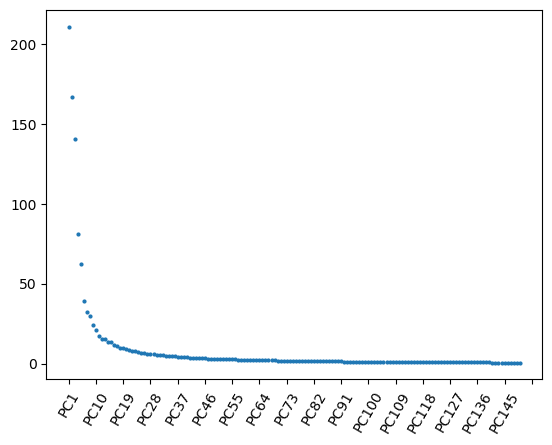

In [48]:
fig, ax = plt.subplots()
ax.plot(resTabelle['Eigenwerte'][:150], 'o', ms=2)
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(plt.MultipleLocator(9))
ax.xaxis.set_minor_locator(plt.MultipleLocator(9))

Text(42.722222222222214, 0.5, 'Anteil Varianz')

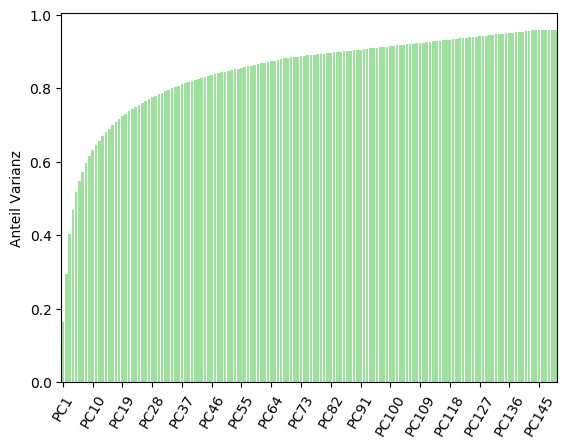

In [49]:
fig = plt.figure();
pcas = ['PC' + str(i) for i in range(1, 151)]
plot_ = sns.barplot(x=pcas, y=resTabelle['SumAnteil'][:150], color="lightgreen")

fig.canvas.draw()
new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 9), new_ticks[::9])
plt.xticks(rotation=60)

plt.ylabel('Anteil Varianz', fontsize=10)


In [50]:
eigengesicher = pd.DataFrame(u)
eigengesichter12 = eigengesicher.iloc[:,:12] # eventuell zeilen?
eigengesichter12

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.051083,-0.018213,0.005234,-0.002736,0.018232,-0.038442,0.025289,0.033210,-0.014176,0.011932,-0.035202,0.032645
1,0.050620,-0.019055,0.006672,-0.002341,0.021817,-0.041710,0.027154,0.033674,-0.015561,0.015513,-0.040508,0.034970
2,0.049580,-0.018880,0.008575,-0.001209,0.025757,-0.044829,0.032331,0.033173,-0.014188,0.021318,-0.047903,0.041910
3,0.048396,-0.018536,0.010370,0.002486,0.030434,-0.045997,0.035217,0.027505,-0.011444,0.027086,-0.053032,0.046547
4,0.047593,-0.018977,0.012437,0.008072,0.034270,-0.044054,0.039454,0.019317,-0.000169,0.032998,-0.045678,0.050390
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.024959,-0.004623,-0.029523,-0.008197,-0.008354,0.068052,0.025029,-0.031888,0.036818,0.071217,-0.006046,0.012901
1020,0.025615,-0.007721,-0.026651,-0.011376,-0.014006,0.065647,0.011437,-0.032412,0.037174,0.084822,0.000644,0.012233
1021,0.025914,-0.008294,-0.024008,-0.012095,-0.017910,0.057614,-0.001507,-0.031758,0.037583,0.094179,0.002418,0.013932
1022,0.027084,-0.007575,-0.021471,-0.011781,-0.020548,0.050827,-0.009031,-0.029320,0.040132,0.092187,0.002195,0.006042


In [51]:
images = []
for col in eigengesichter12:
    colArr = np.array(eigengesichter12[col])
    imgTmp = np.array_split(colArr, 32)
    images.append(imgTmp)

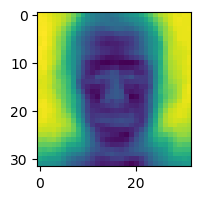

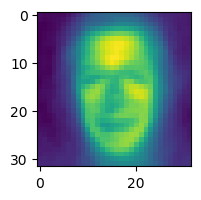

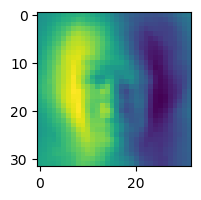

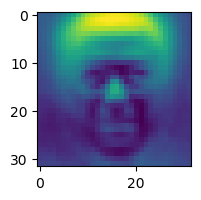

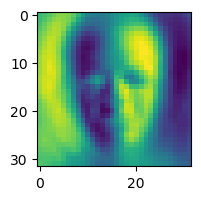

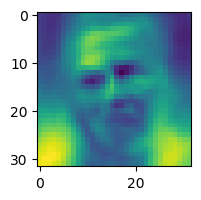

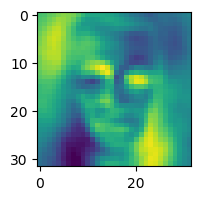

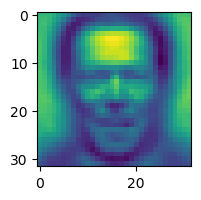

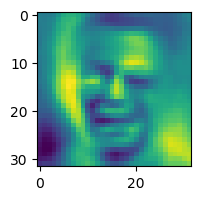

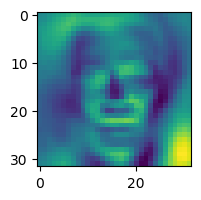

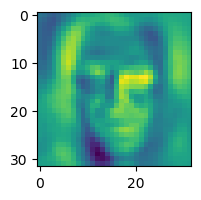

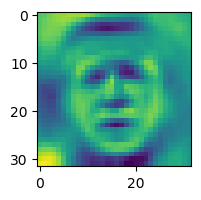

In [52]:
for img in images:
    plt.figure(figsize=(5,2))
    plt.imshow(img)
    plt.show()

Interpretation des Ergebnisses:
Eigengesichter vertreten verschiedene Eigenschaften/Merkmal der Trainingsbilder z.B. Ausleuchtung, Haare, Gesicht, ..

d.

Projizierung der Trainings- und Testbilder auf die ersten 7 Eigengesichter

In [53]:
dataTrainingMean = dataTraining.mean()

eigengesichter7 = eigengesicher.iloc[:,:7]

In [54]:
def projectOrthogonal(u, n):
    n_norm = np.sqrt(sum(n**2))   
    proj_of_u_on_n = (np.dot(u, n)/n_norm**2)*n 
    return  u - proj_of_u_on_n

In [69]:
def project(u, n):
    return  u*n

In [70]:
dataTestM = testMatrix.loc[:,:1023] - dataTrainingMean
testProjectedData = []
for index, row in dataTestM.iterrows():
    projTest = []
    for col in eigengesichter7:
        proj = project(np.array(row), np.array(eigengesichter7[col]))
        projTest.append(proj)
    testProjectedData.append(projTest)

In [71]:
dataTrainingM = dataTraining-dataTrainingMean
trainingProjectedData = []
for index, row in dataTrainingM.iterrows():
    projTest = []
    for col in eigengesichter7:
        proj = project(np.array(row), np.array(eigengesichter7[col]))
        projTest.append(proj)
    trainingProjectedData.append(projTest)

Gesichtserkennung: euklidischen Abstand des Testbildes in diesem 7-dimensionalen Merkmalsraum zu allen Trainingsbildern berechnen. Die Persondes am nächsten liegenden Trainingsbildes (d.h. mit dem minimalen euklidischen Abstand) istdann (vermutlich) auch die korrekte Person für das Testbild (Nächster-Nachbar-Klassifikator).Welche Bilder werden korrekt klassifiziert, welche Verwechslungen gibt es?

In [72]:
from scipy.spatial import distance

In [59]:
def printImage(testImg, trainingImg):
    imgtest = np.array_split(testImg[0], 32)
    plt.figure(figsize=(5,2))
    plt.imshow(imgtest)
    plt.show()
    imgtraining = np.array_split(trainingImg[0], 32) 
    plt.figure(figsize=(5,2))
    plt.imshow(imgtraining)
    plt.show()
    print("_____________________")

--  Testperson: Ariel_Sharon  -> zugeordnete Person: George_W_Bush


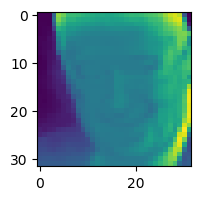

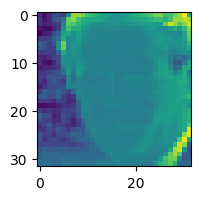

_____________________
--  Testperson: Colin_Powell  -> zugeordnete Person: Colin_Powell


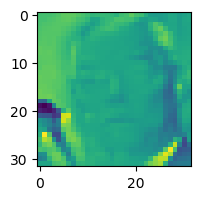

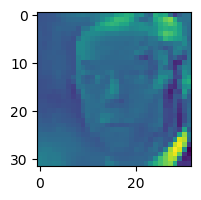

_____________________
--  Testperson: Gerhard_Schroeder  -> zugeordnete Person: George_W_Bush


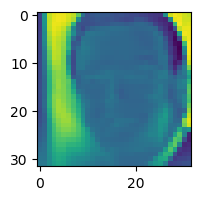

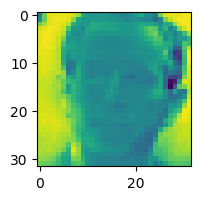

_____________________
--  Testperson: Tony_Blair  -> zugeordnete Person: George_W_Bush


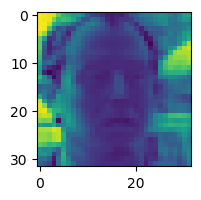

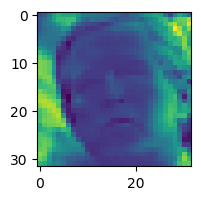

_____________________
--  Testperson: George_W_Bush  -> zugeordnete Person: George_W_Bush


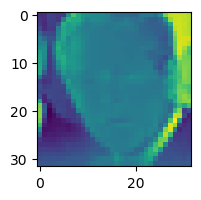

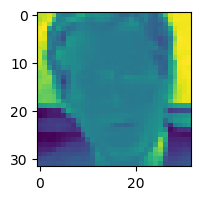

_____________________
--  Testperson: Hugo_Chavez  -> zugeordnete Person: Gerhard_Schroeder


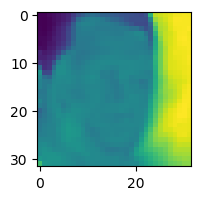

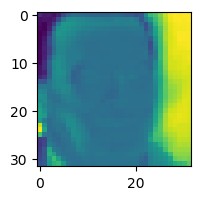

_____________________
--  Testperson: Donald_Rumsfeld  -> zugeordnete Person: Donald_Rumsfeld


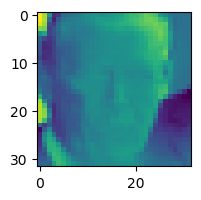

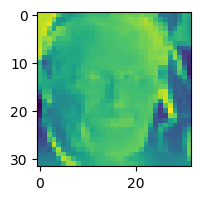

_____________________


In [73]:
for idx, testImg in enumerate(testProjectedData):
    testperson = 'Testperson: ' + testMatrix.iloc[idx][1024]
    #print(testperson)
    classifiedPerson = '--'
    trainingImgClassified = []
    minEucl = -1
    for idx2, trainingImg in enumerate(trainingProjectedData):
        trainingperson = trainingMatrix.iloc[idx2][1024]
        euclSum = 0
        for m, merkmal in enumerate(testImg):
            euclSum += distance.euclidean(testImg[m], trainingImg[m])
        if (minEucl == -1):
            minEucl = euclSum
        elif (euclSum < minEucl):
            minEucl = euclSum
            classifiedPerson = trainingperson
            trainingImgClassified = trainingImg
            #print('changed :' + classifiedPerson + " " + str(euclSum))
    print("--  " + testperson + "  -> zugeordnete Person: " + classifiedPerson)
    printImage(testImg, trainingImgClassified)

In [74]:
%version_information numpy, pandas, seaborn

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 5.4.0 53 generic x86_64 with debian bullseye sid
numpy 1.18.1
pandas 1.0.1
seaborn 0.10.0
Mon Nov 16 08:44:24 2020 CET